# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

# Цели проекта

1) Определить причины неэффективности привлечения пользователей;

2) Сформулировать рекомендации для отдела маркетинга.

### Загрузка данных и подготовка их к анализу

In [519]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [520]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [521]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [522]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [523]:
visits.columns = ['user_id','region', 'device', 'channel', 'session_start', 'session_end']

Переименовал в удобный формат

In [524]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Исправил тип данных, где это необходимо и проверил ниже

In [525]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [526]:
visits.duplicated().sum()

0

In [527]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Отлично, явных дубликатов и пропусков нет

Тоже самое проделаем и с остальными данными

In [528]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [529]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [530]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [531]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [532]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [533]:
orders.duplicated().sum()

0

In [534]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [535]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [536]:
costs = costs.rename(columns={'Channel': 'channel'})

In [537]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [538]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [539]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [540]:
costs['dt'] = pd.to_datetime(costs['dt'])

??????

Вопрос, почему у меня в этом датафрейме не работает данная функция: costs['dt'] = pd.to_datetime(costs['dt']).dt.date,
а только вышеуказанная? Ведь у нас только дата без времени. Просмотрел 2 форма и в обоих написано, что должно работать.

In [541]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [542]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [543]:
costs.duplicated().sum()

0

In [544]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Датафреймы проверены на дубликаты и пропуски, также были заменены некоторые типы данных и переименованы название колонок в удобный формат

### Задаем необходимые функции для расчёта и анализа LTV, ROI, удержания, конверсии и проверяем их работоспособность.

In [545]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = (profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [546]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [547]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                    
        result = result.div(result['cohort_size'], axis = 0)                                                     
        result = result[['cohort_size'] + list(range(horizon_days))]                                             
        result['cohort_size'] = cohort_sizes                                                                     
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time



In [548]:
retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 5, 13).date(), 6, dimensions = [])
retention_history


cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   
      2019-05-06          952  1.0  0.155462  0.089286  0.048319  0.036765   
      2019-05-07          846  1.0  0.186761  0.078014  0.061466  0.029551   
      2019-05-08          742  1.0  0.173854  0.086253  0.037736  0.029650   
True  2019-05-01           41  1.0  0.487805  0.390244  0.439024  0.219512   
      2019-05-02           30  1.0  0.566667  0.300000  0.300000  0.300000   
      2019-05-03           42  1.0  0.476190  0.500000  0.285714  0.357143   
      2019-05-04           55  1.0  0.436364  0.272727  0.327273  0.309091   
      2019-05-05           35  1.0  0.457143  0.371429  0.342857  0.228571   
      2019-05-06           62  1.0  0.483871  0.338710  0.225806  0.258065   
      2019-05-07           42  1.0  0.547619  0.428571  0.309524  0.261905   
      2019-05-08           40  1.0  0.475000  0.325000  0.200000  0.300000   

                         5  
payer dt                    
False 2019-05-01  0.021889  
      2019-05-02  0.017857  
      2019-05-03  0.035936  
      2019-05-04  0.016667  
      2019-05-05  0.020321  
      2019-05-06  0.026261  
      2019-05-07  0.021277  
      2019-05-08  0.024259  
True  2019-05-01  0.219512  
      2019-05-02  0.266667  
      2019-05-03  0.357143  
      2019-05-04  0.254545  
      2019-05-05  0.257143  
      2019-05-06  0.225806  
      2019-05-07  0.214286  
      2019-05-08  0.200000

In [549]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [550]:
con_raw, con, con_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 5, 13).date(), 6,
    dimensions=[]
)

In [551]:
con_history

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0
dt,,,,,,,
2019-05-01,909,0.031903,0.036304,0.038504,0.038504,0.040704,0.040704
2019-05-02,758,0.029024,0.035620,0.036939,0.036939,0.036939,0.036939
2019-05-03,849,0.031802,0.037691,0.043581,0.044759,0.047114,0.047114
2019-05-04,1015,0.035468,0.039409,0.040394,0.042365,0.047291,0.047291
2019-05-05,970,0.023711,0.026804,0.028866,0.030928,0.032990,0.032990
2019-05-06,1014,0.032544,0.042406,0.045365,0.049310,0.051282,0.052268
2019-05-07,888,0.031532,0.036036,0.040541,0.041667,0.041667,0.041667
2019-05-08,782,0.035806,0.040921,0.042199,0.043478,0.044757,0.047315


In [552]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [553]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,  
    orders,
    datetime(2019, 5, 13).date(), 6,
    dimensions=['channel'],
    ignore_horizon=False,
)

In [554]:
roi_history

cohort_size       cac       0.0       1.0  \
channel        dt                                                      
AdNonSense     2019-05-01           39  1.050000  0.243712  0.365568   
               2019-05-02           36  0.962500  0.000000  0.000000   
               2019-05-03           45  1.050000  0.211217  0.443598   
               2019-05-04           51  1.008824  0.484937  0.581924   
               2019-05-05           36  1.020833  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-05-04           24  0.733333  3.690909  3.974432   
               2019-05-05           17  0.752941  0.389844  0.779687   
               2019-05-06           20  0.720000  1.386111  2.079167   
               2019-05-07           21  0.761905  0.935625  0.935625   
               2019-05-08           14  0.800000  0.445536  0.445536   

                                2.0       3.0       4.0       5.0  
channel        dt                                                  
AdNonSense     2019-05-01  0.365568  0.365568  0.487424  0.487424  
               2019-05-02  0.000000  0.000000  0.000000  0.000000  
               2019-05-03  0.443598  0.443598  0.443598  0.443598  
               2019-05-04  0.581924  0.581924  0.581924  0.581924  
               2019-05-05  0.841905  0.841905  0.841905  0.841905  
...                             ...       ...       ...       ...  
lambdaMediaAds 2019-05-04  4.541477  4.541477  7.948864  8.232386  
               2019-05-05  0.779687  0.779687  0.779687  0.779687  
               2019-05-06  2.079167  2.772222  2.772222  2.772222  
               2019-05-07  0.935625  0.935625  1.247500  1.247500  
               2019-05-08  0.445536  0.445536  0.445536  0.445536  

[80 rows x 8 columns]

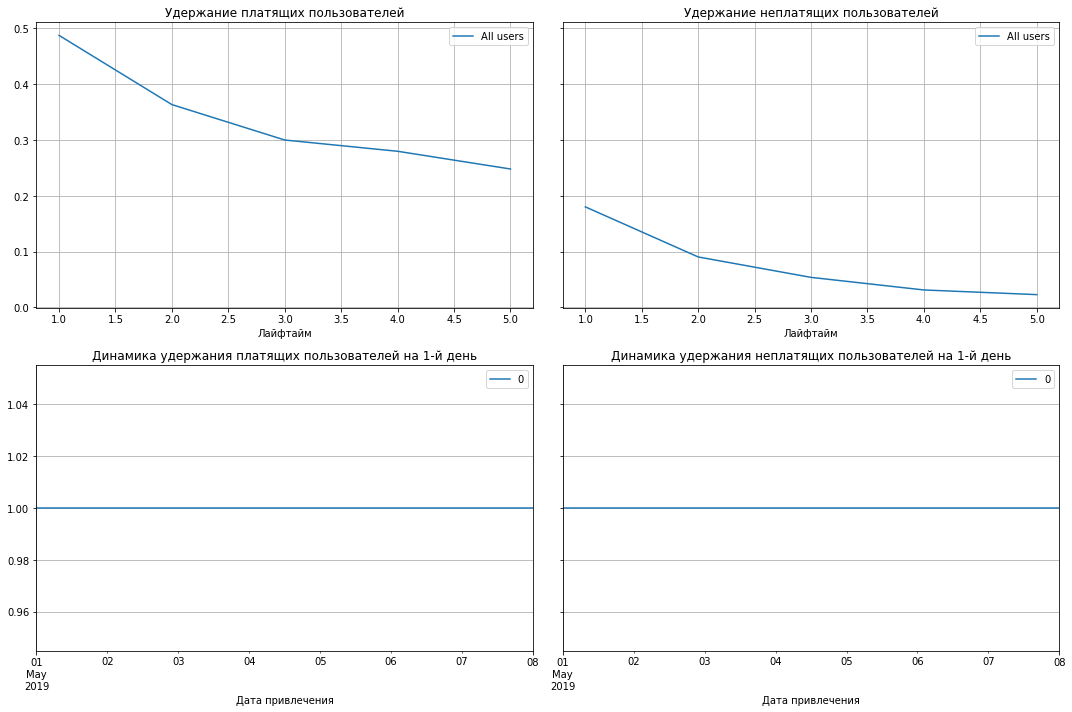

In [555]:
def plot_retention(retention, retention_history, horizon_days):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon_days
        )
    )
    
    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

plot_retention(retention, retention_history, 1)

In [556]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


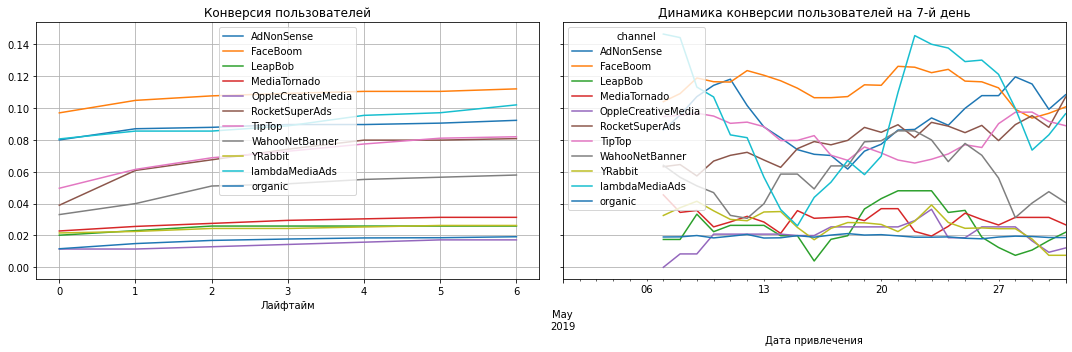

In [557]:
def plot_conversion(conversion, conversion_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 6, 6).date(),
    7,
    dimensions=['channel'],
)
plot_conversion(conversion, conversion_history, 7) 

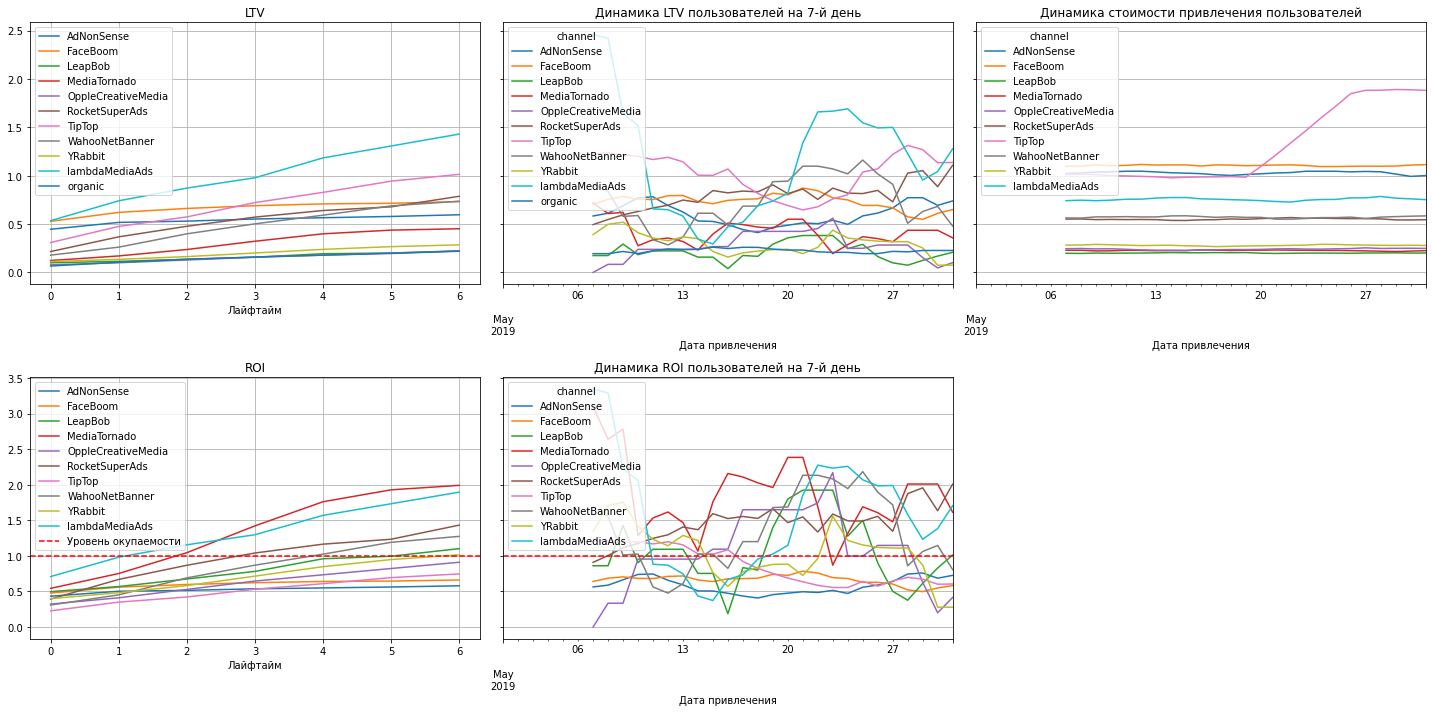

In [558]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon_days - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon_days - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon_days))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 6, 6).date(),
    7,
    dimensions=['channel'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 7) 

Функции заданы и вызваны для проверки 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

In [559]:
display('Профили пользователей')
display(profiles)
display('Минимальная дата привлечения')
display(profiles['first_ts'].min())
display('Максимальная дата привлечения')
profiles['first_ts'].max()


'Профили пользователей'

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


'Минимальная дата привлечения'

Timestamp('2019-05-01 00:00:41')

'Максимальная дата привлечения'

Timestamp('2019-10-27 23:59:04')

Профили пользователей выведены, первая дата привлечения 01.05.2019, последняя дата привлечения 27.10.2019

In [560]:
region_max = profiles.groupby('region').agg({'payer':'mean', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
region_max['count_max'] = region_max['payer']*region_max['user_id']
region_max.sort_values(by='count_max', ascending=False).style.format('{:.2f}')

,payer,user_id,count_max
region,,,
United States,0.07,100002.00,6902.00
UK,0.04,17575.00,700.00
France,0.04,17450.00,663.00
Germany,0.04,14981.00,616.00


В приложение приходят пользователи из США, Великобритании, Франции и Германия. Наибольшая доля пользователей приходится на США, наименьшая на Германию

In [561]:
device_max = profiles.groupby('device').agg({'payer':'mean', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
device_max['device_max'] = device_max['payer']*device_max['user_id']
device_max.sort_values(by='device_max', ascending=False).style.format('{:.2f}')

,payer,user_id,device_max
device,,,
iPhone,0.06,54479.00,3382.00
Android,0.06,35032.00,2050.00
Mac,0.06,30042.00,1912.00
PC,0.05,30455.00,1537.00


Клиенты пользуются IPhone, Android, MAC и PC, наибольшая доля платящих пользователей приходится на IPhone

In [562]:
channel_max = profiles.groupby('channel').agg({'payer':'mean', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
channel_max['channel_max'] = channel_max['payer']*channel_max['user_id']
channel_max.sort_values(by='channel_max', ascending=False).style.format('{:.2f}')

,payer,user_id,channel_max
channel,,,
FaceBoom,0.12,29144.00,3557.00
TipTop,0.10,19561.00,1878.00
organic,0.02,56439.00,1160.00
WahooNetBanner,0.05,8553.00,453.00
AdNonSense,0.11,3880.00,440.00
RocketSuperAds,0.08,4448.00,352.00
LeapBob,0.03,8553.00,262.00
OppleCreativeMedia,0.03,8605.00,233.00
lambdaMediaAds,0.10,2149.00,225.00


Больше всего пользователей, а также платящих пользователей пришло с канала FaceBoom, после него уже канал TipTop и на третьем месте organic, что говорит о том, что пользователи не плохо находятся и без рекламы

Полученные выше данные нельзя принимать за чистую монету, ведь один пользователь мог совершить несколько покупок, в то время как остальные ни одной. 

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постараемся отразить это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Сформулируем промежуточные выводы.

In [563]:
display(costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False))
'Общая сумма расходов:', costs['costs'].sum() 

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


('Общая сумма расходов:', 105497.30000000002)

Объединив первые 2 пункта шага 4 получаем результат:

По полученным данным можно сказать, что основные траты на рекламу приходятся на TipTop и FaceBoom. Общая сумма расходов на рекламу составляет 105497.3$ (так как в условии не указана валюта предположим, что это доллары)

In [564]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = costs['dt'].astype('datetime64[W]')

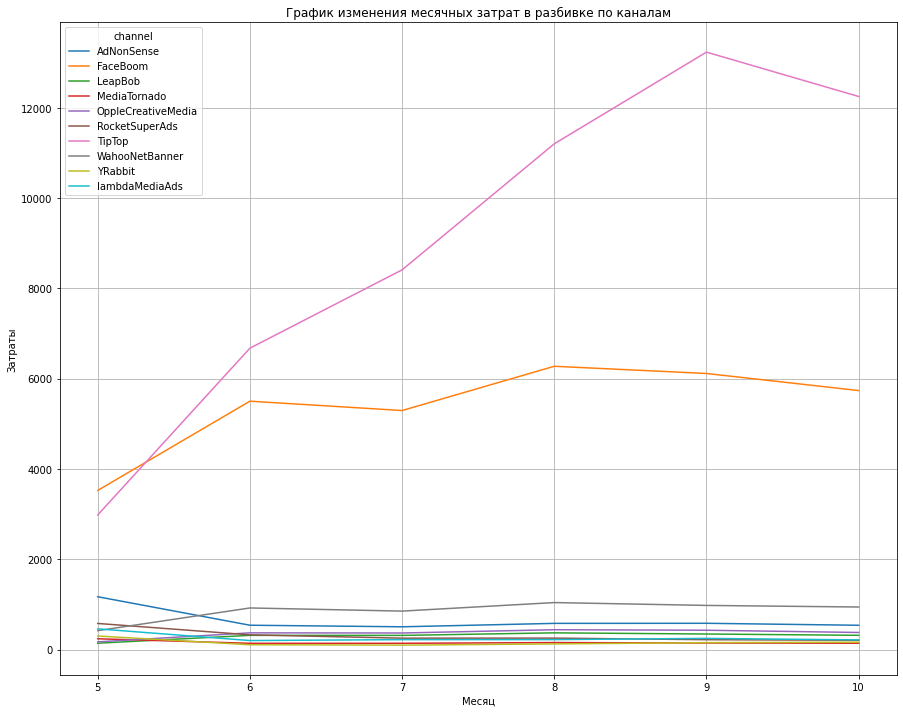

In [565]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')\
.plot(grid=True,figsize=(15,12))
plt.title('График изменения месячных затрат в разбивке по каналам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

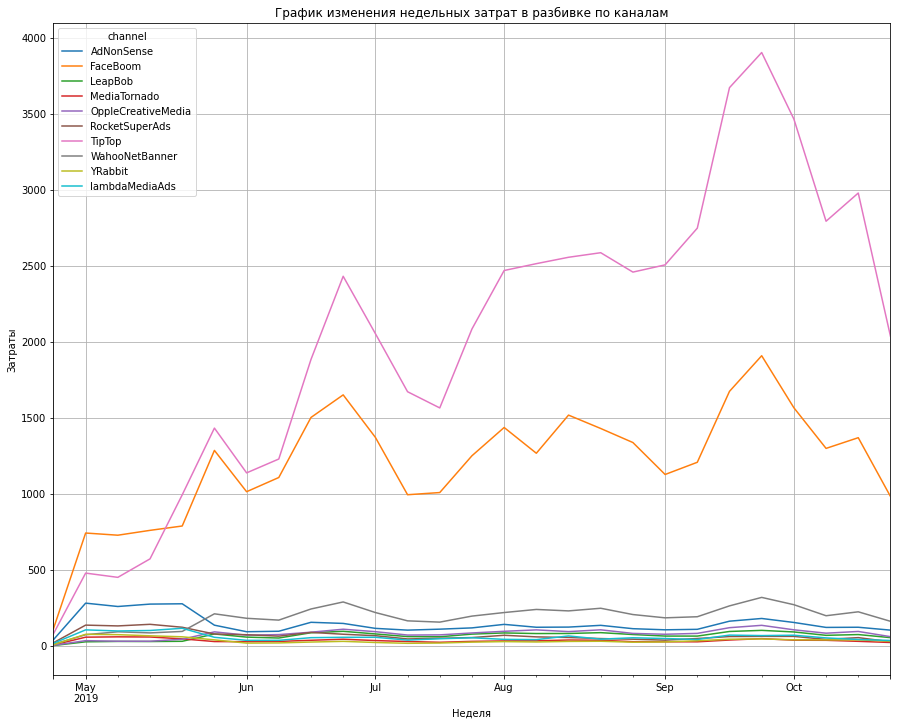

In [566]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')\
.plot(grid=True,figsize=(15,12))
plt.title('График изменения недельных затрат в разбивке по каналам')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()

График подтвердил данные полученные в табличном виде - самые большие траты приходятся на TipTop и FaceBoom.Но стоит обратить внимание, что на эти каналы изначально были самые высокие затраты. Также на недельном графике можно заметить, что затраты на TipTop и FaceBoom то растут то падают, с сентября по октябрь самые высокие затраты, а далее они опускаются. Все остальные платформы по привлечения стабильны в течение всего периода

In [567]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самая большая средняя стоимость привлечения у платформы TipTop, далее FaceBoom и AdNonSense, что и подтвержадет вышепостроенные графики

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 
Сформулируем выводы и возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [568]:
# Относится к Комментарий ревьюера v2:☁️ (№2)
profiles_drop = profiles.query('channel=="organic"')

In [569]:
# Относится к Комментарий ревьюера v2:☁️ (№2)
for x in profiles_drop['user_id']:
    if x in profiles['user_id']:
        profiles = profiles[profiles.column_name.isin (x) == False]
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


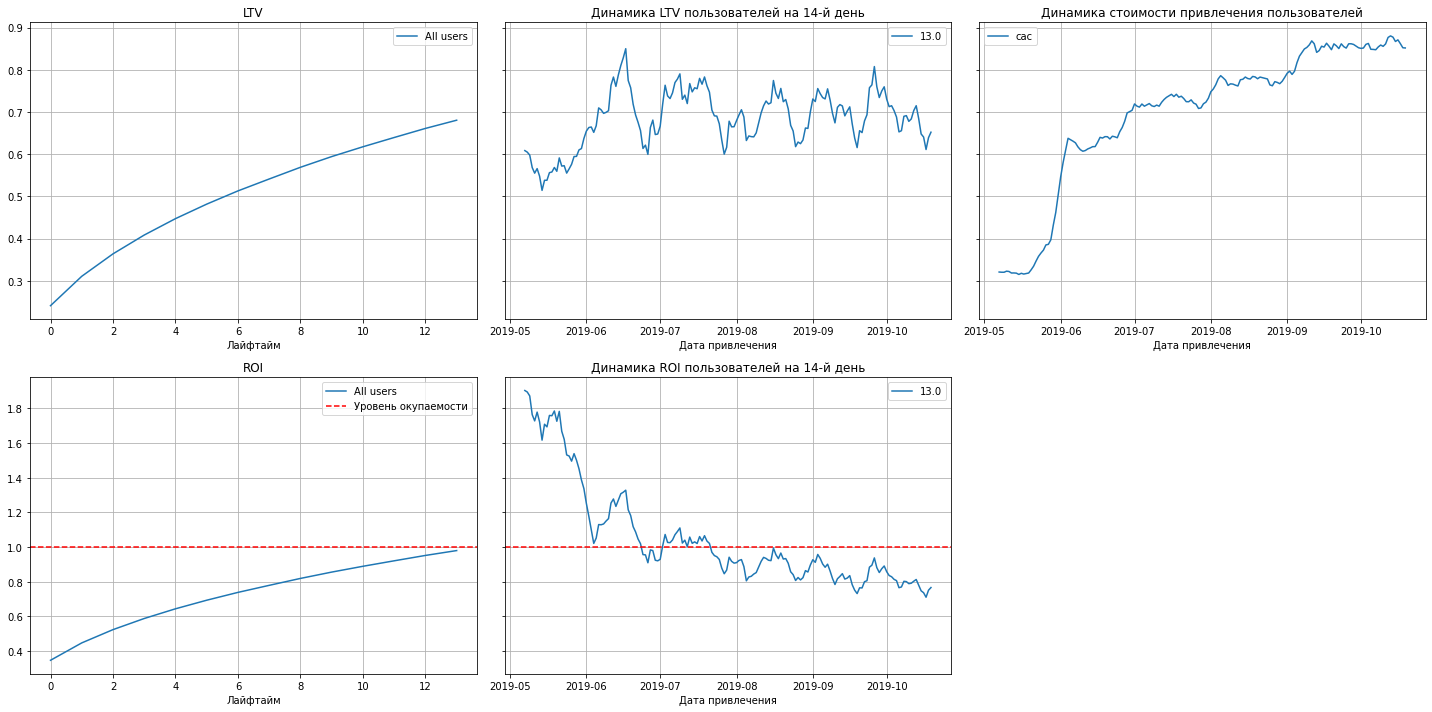

In [570]:
# Относится к Комментарий ревьюера v2:☁️ (№2)
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)


plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

In [571]:
# Относится к Комментарий ревьюера:☁️ (№1)
not_organic = visits[visits['channel'] != 'organic' ]

In [572]:
# Относится к Комментарий ревьюера:☁️ (№1)
profiles = get_profiles(not_organic, orders, costs)

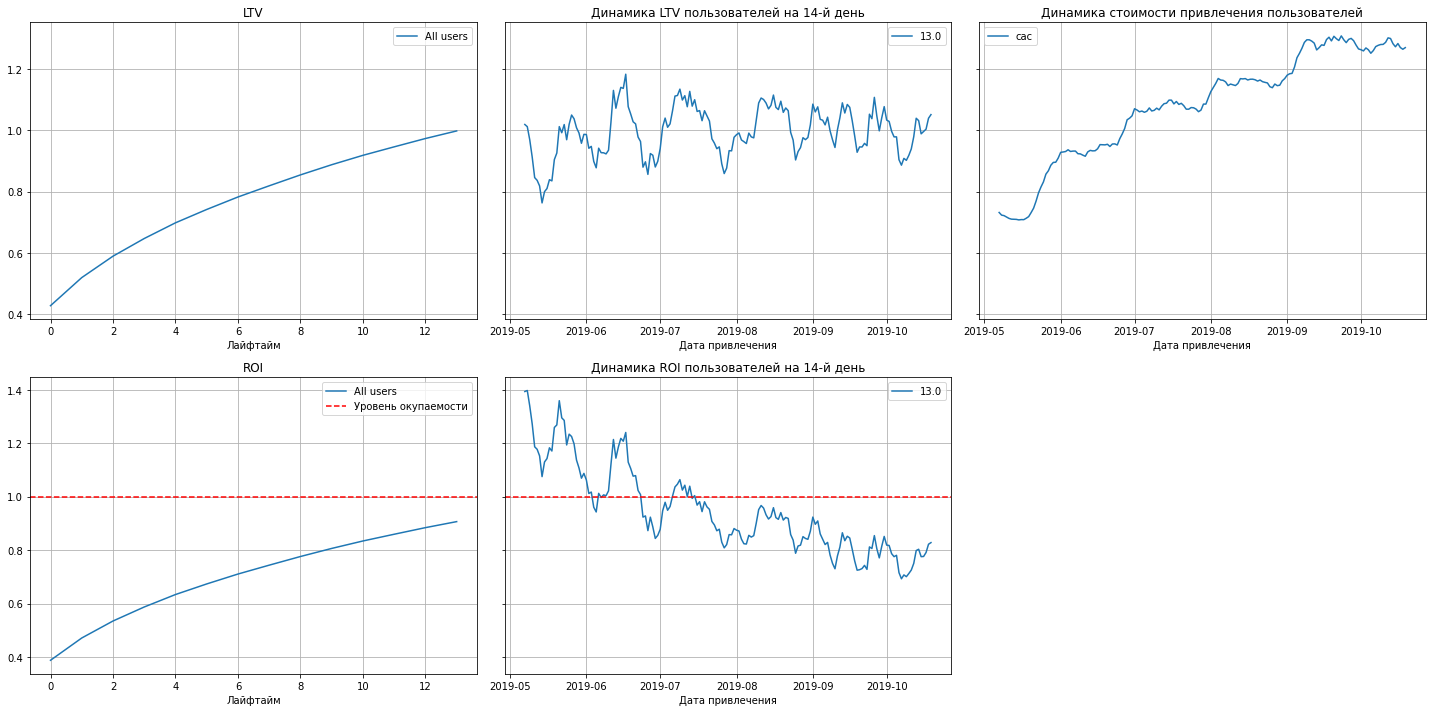

In [573]:
# Относится к Комментарий ревьюера:☁️ (№1)
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)


plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

По графику Динамики стоимости привлечения пользователей можно заметить, что средняя стоимость привлечения растет. По графику ROI можно заметить, что затраты на рекламу не окупаются. По динамике ROI можно заметить, что с конца июля затраты на рекламу превышают выручку от привлеченных пользователей.

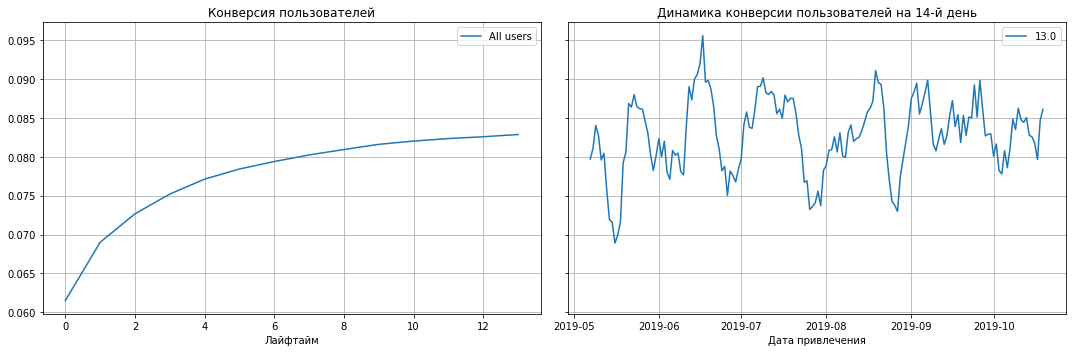

In [576]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14
)
plot_conversion(conversion, conversion_history, 14)

Конверсия пользователей равномерно растер на последний день жизни составляет 5,8%. По динамике конверсии можно скзаать, что в середине мая конверсия начала резко расти и далее стабильно колибалась до ноября.

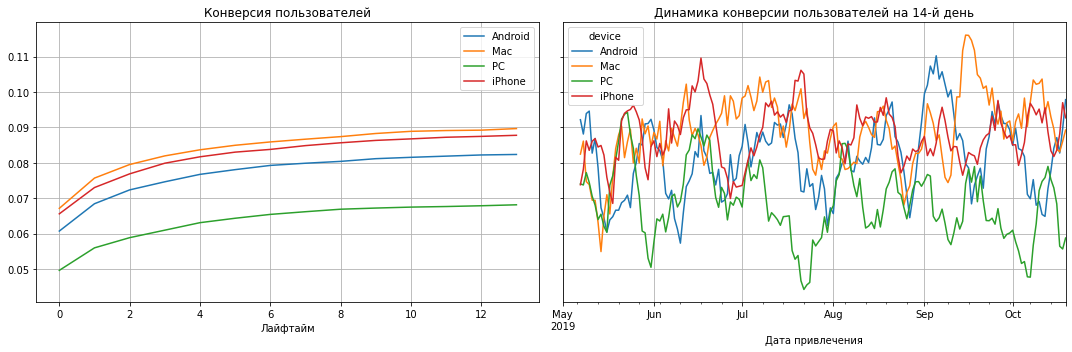

In [577]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device']
)
plot_conversion(conversion, conversion_history, 14)

По графику можно сказать, что пользователи Мас и Iphone лучше переходят в состояние платящих

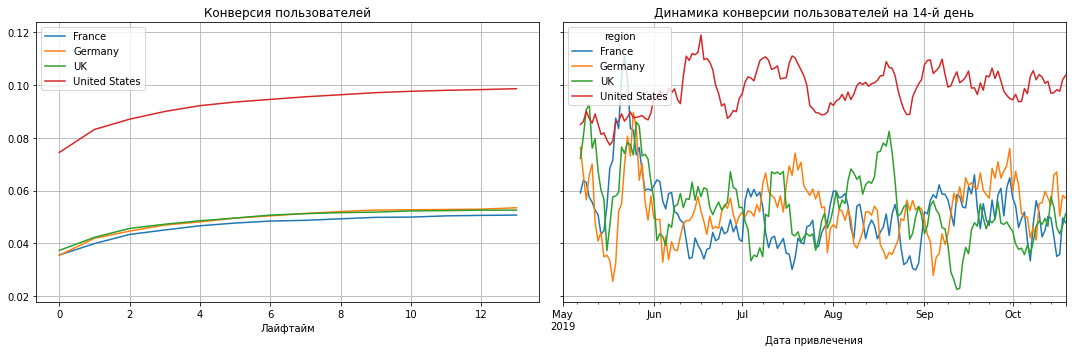

In [578]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region']
)
plot_conversion(conversion, conversion_history, 14)

По странам явным лидером по конверсии является США 

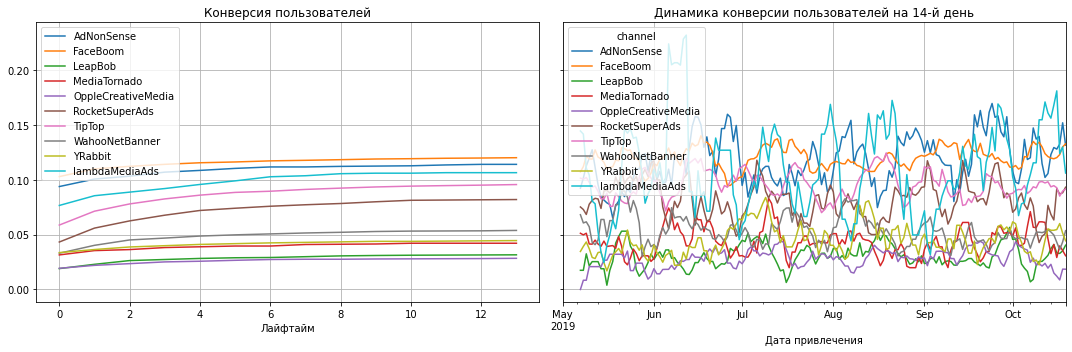

In [579]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)
plot_conversion(conversion, conversion_history, 14)

По каналам привлечения можно сказать, что в 3 лучших входят: FaceBoom, AdNoneSense, lambdaMediaAds

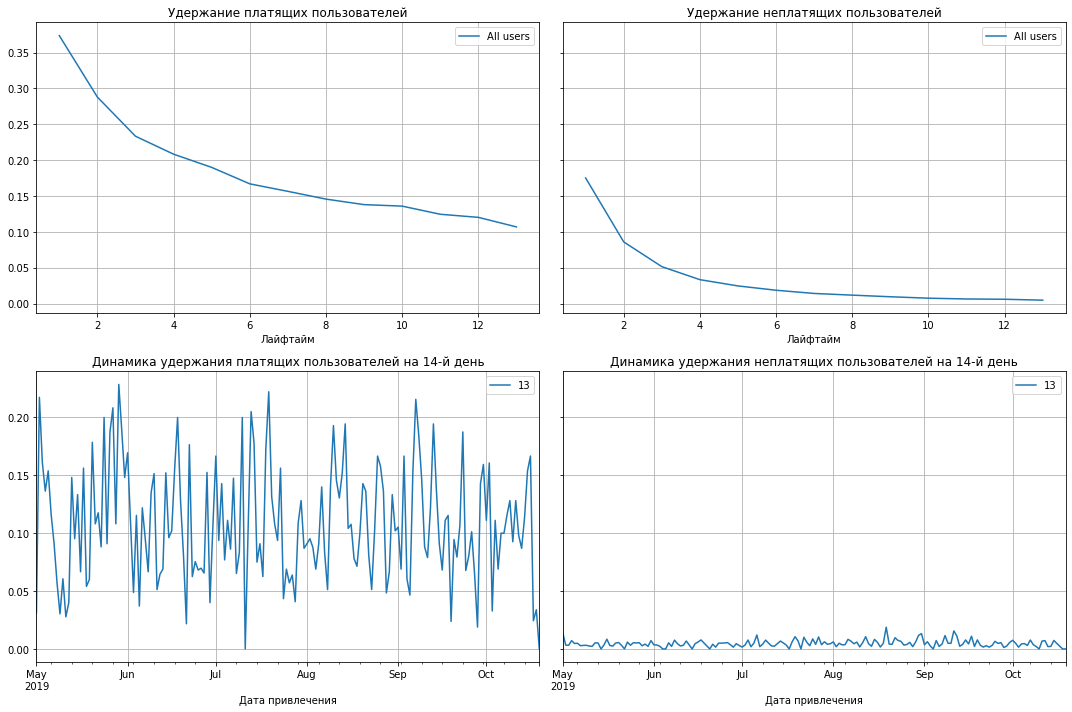

In [580]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits,
    datetime(2019, 11, 1).date(), 14)

plot_retention(retention, retention_history, 14)

По гравфикам можно сказать, что удержание платящих пользователей выше, чем у неплатящих, по динамике можно сказать, что удержание платящих пользователей колебается но в среднем за весь период составляет 12%, динамика неплатящих пользователей более стабильна и в среднем более 0%

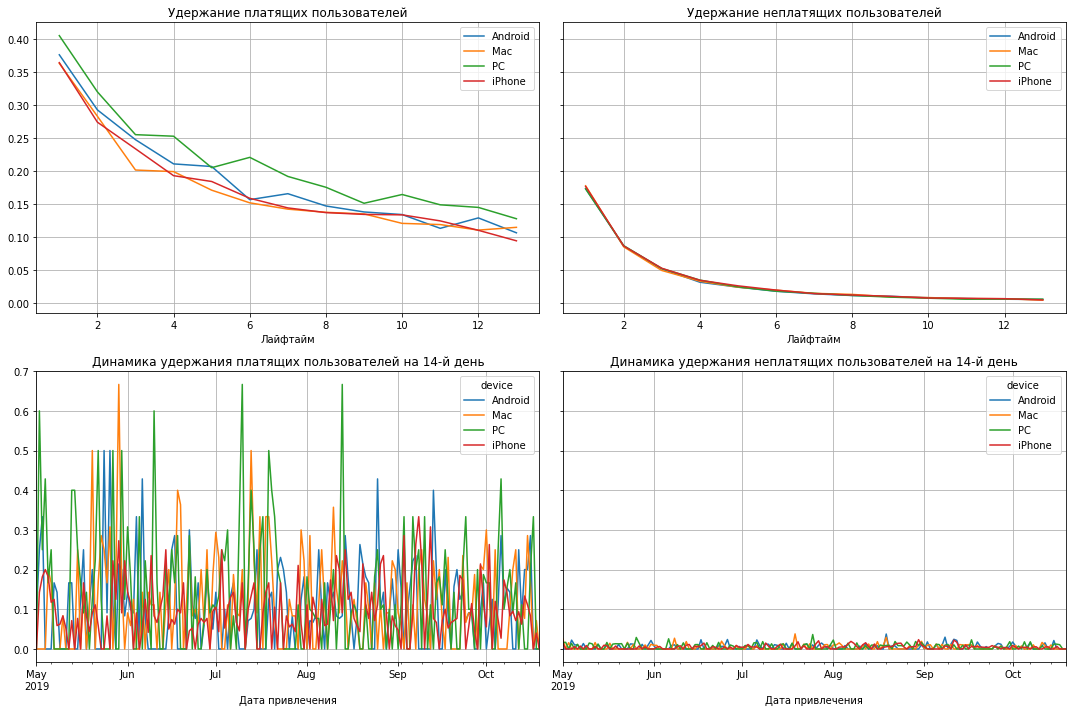

In [581]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits,
    datetime(2019, 11, 1).date(), 14, dimensions=['device'])

plot_retention(retention, retention_history, 14)

Удержание платящих пользователей пользователей выше у пользователей PC, у не платящих явный лидер или аутсайдер по девайсам отсутсвуюет 

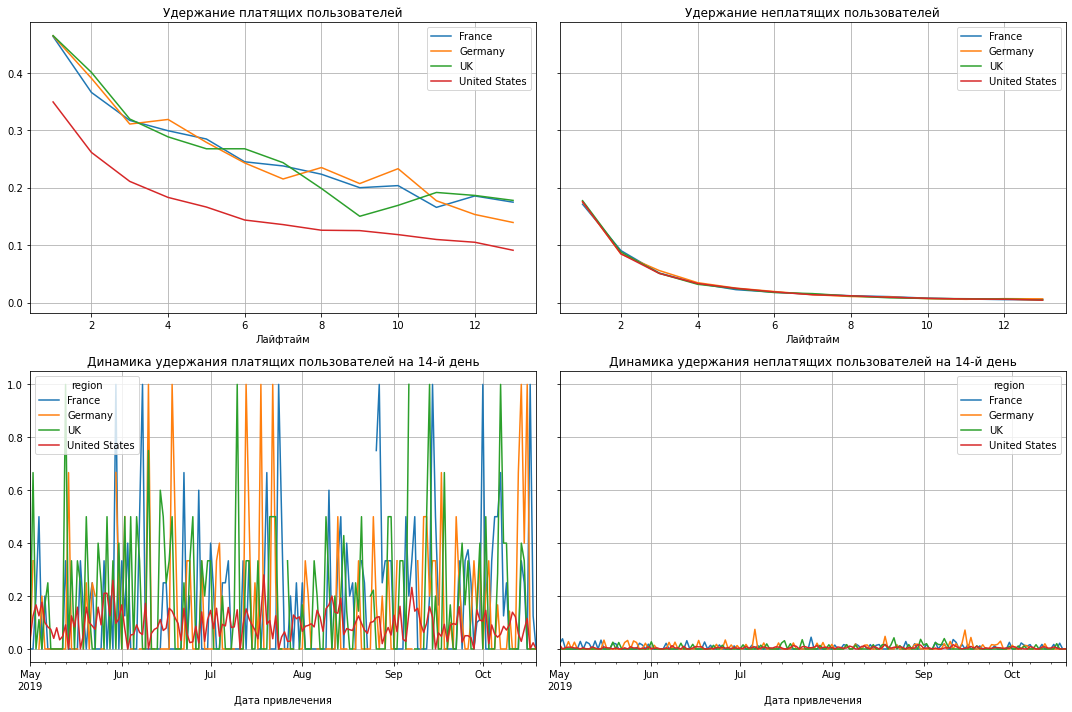

In [582]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits,
    datetime(2019, 11, 1).date(), 14, dimensions=['region'])

plot_retention(retention, retention_history, 14)

Удержание платящих пользователей в европейских странах примерно одиниковое и явно выше, чем в США. Удержание неплатящих пользователей во всех странах примерно одинаковое.

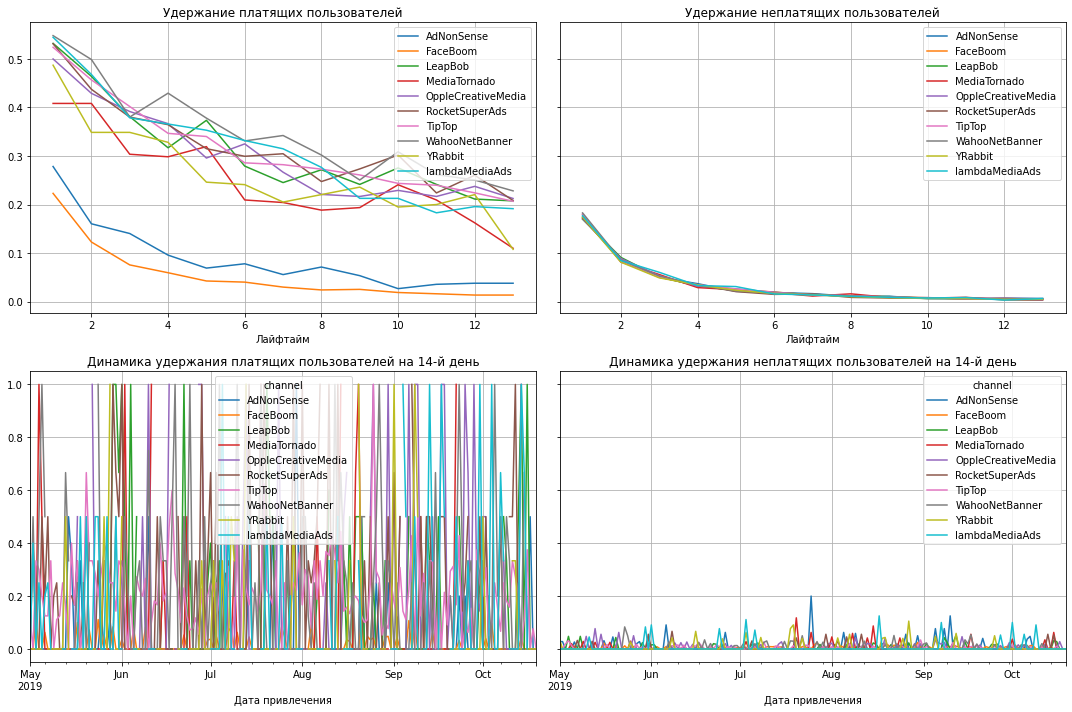

In [583]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits,
    datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

plot_retention(retention, retention_history, 14)

Удержание платящих пользователей выше у WahooNetBanner, однако не намного выше остальных, не считая FaceBoom, AdNoneSense - они являются явными аутсайдерами. Удержание не платящих пользователей у всех компаний примерно одинаковое

#### По дополнительным графикам конверсии и удержания можно заметить аномалии. Переходы по рекламе на устройствах MAC и iPhone - самые объемные. Также Америка в лидерах по конверсии, но при этом показывает ужасные результаты по удержанию клиентов. В связи с чем можно сделать вывод, что клиенты после первой покупки теряют интерес к приложению, причной этому может служить - технические неполадки, недовольство пользователей продуктом, а также отсутствие мотивации в совершении новой покупки.

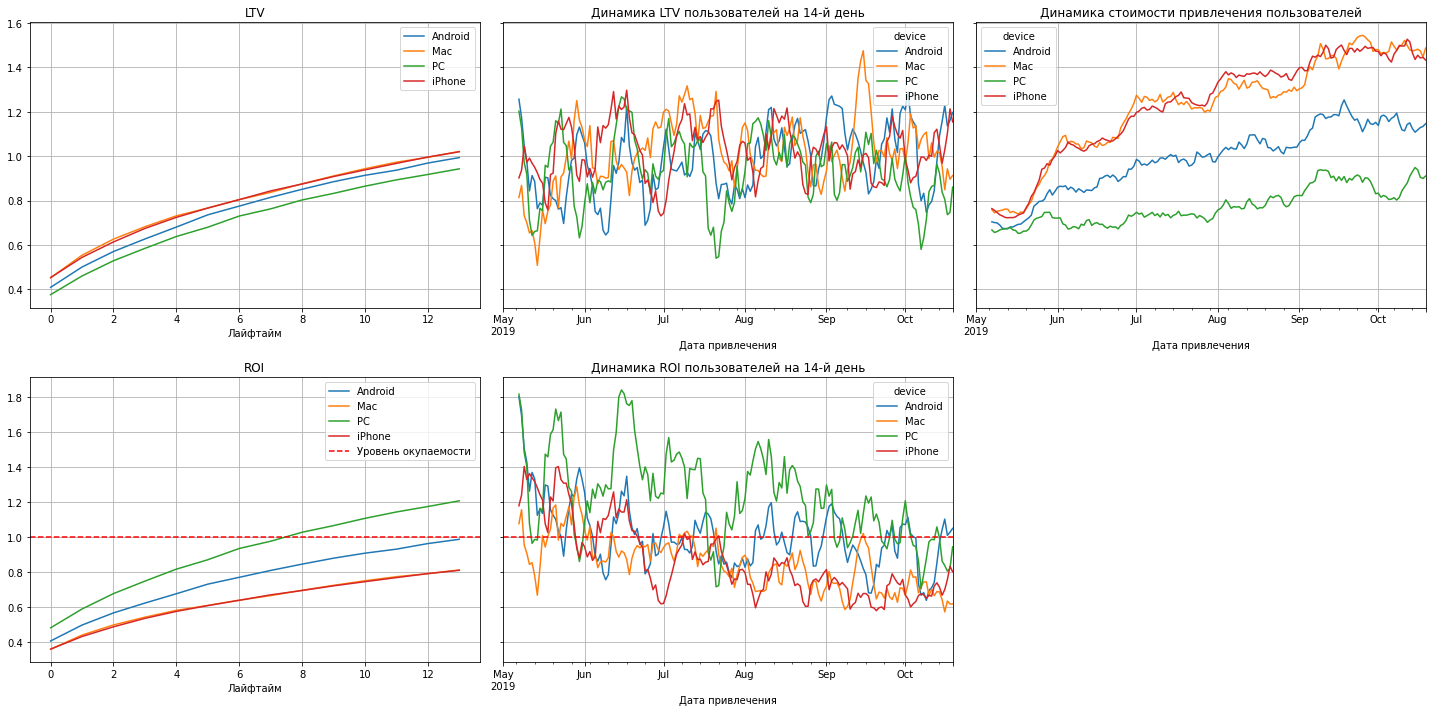

In [584]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device']
)


plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

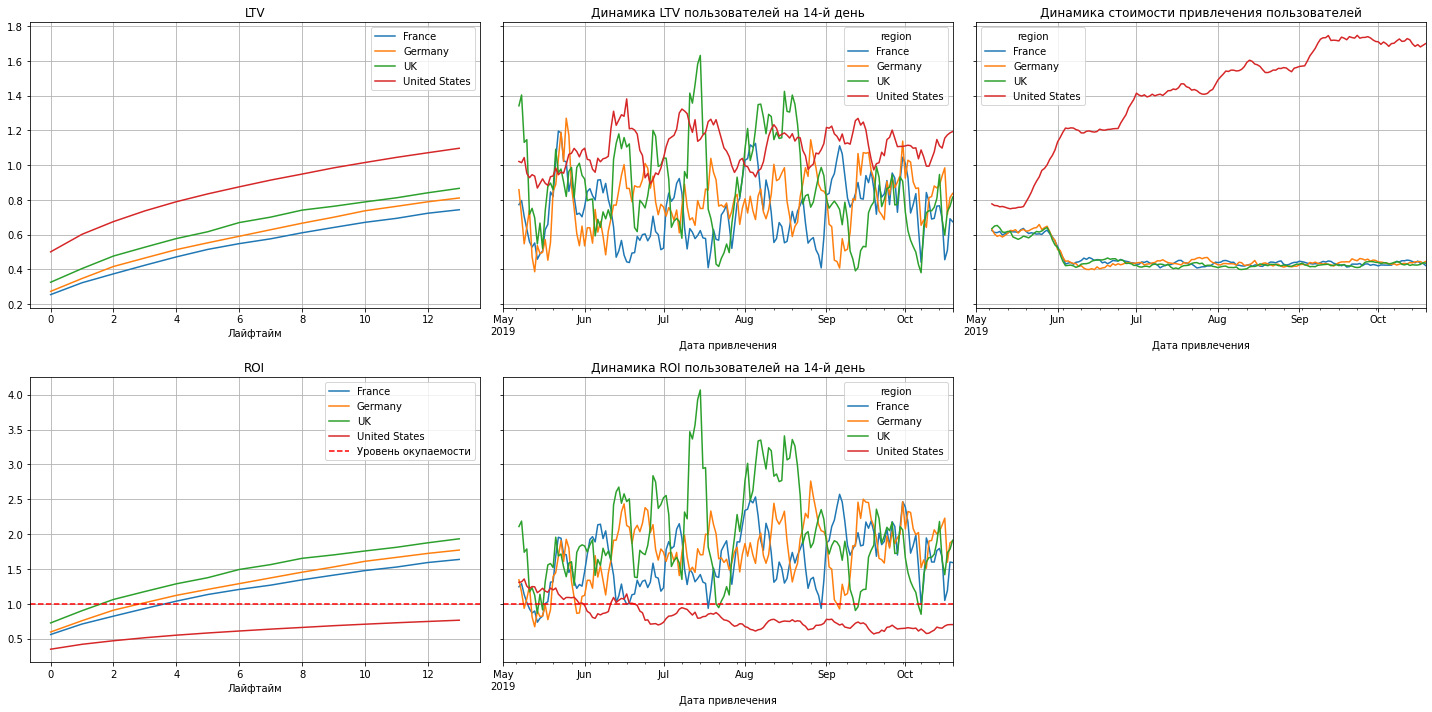

In [585]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region']
)


plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

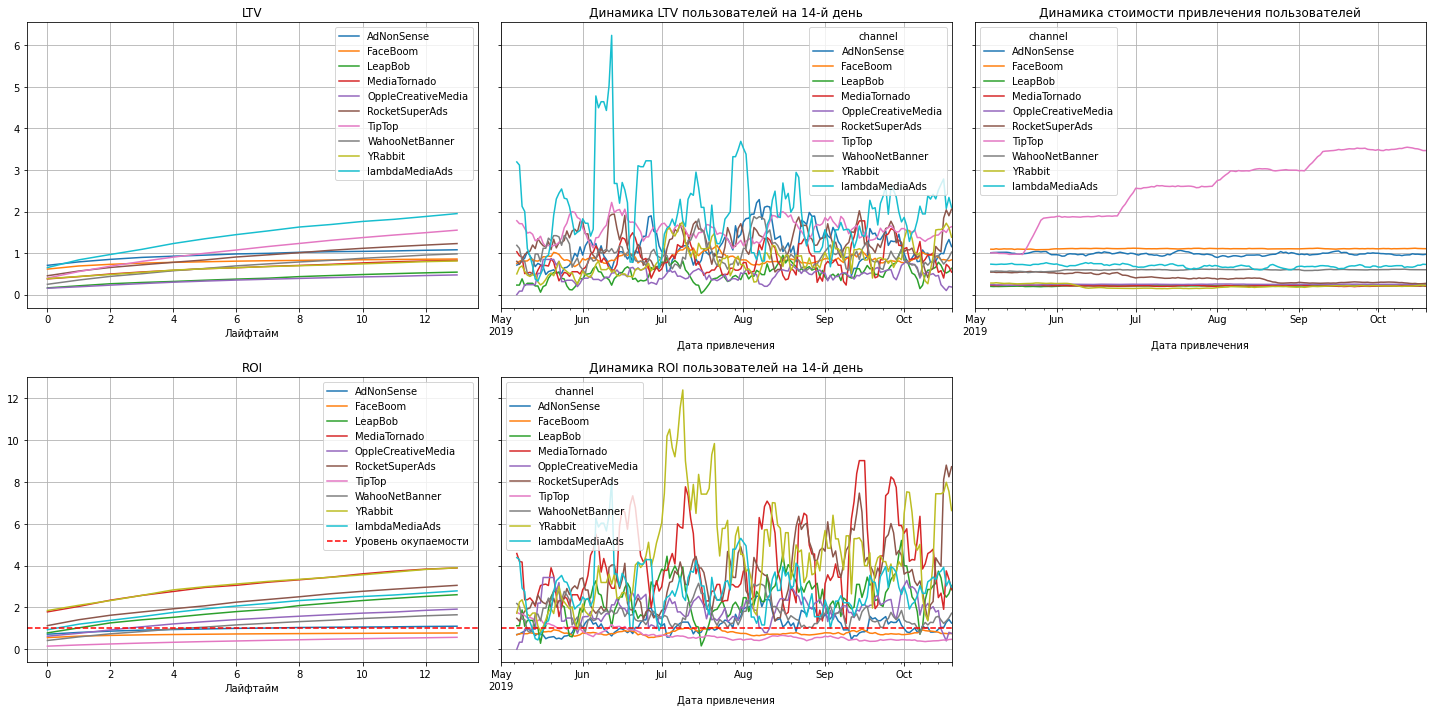

In [586]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel']
)


plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Судя по общему графику окупаемости эффективности реклама не выходит в плюс. Сюдя по графику можно заметить, что самые большие траты приходятся на владельцев Мас и Ipone они показываеют хорошие результаты по привлечению пользователей, но не дотягивают до уровня окупаемости. Не смотря на большой поток пользователей из США, самые большие затратраты уходят на этот регион. Стоимоть привлечениея постоянно растет и стоимость привлечение превышает выручку. Можно заметить, что канал TIPTOP оказывает негативное влияние на окупаемость рекламы, так как расходы на рекламу растут ежемесячно, но динамика ROI на протяжении всего периода не превышает уровень окупаемости.

Основная проблема неправильное распределение денежных средств на рекламу, стоит пересмотреть необходимость вложения дережных средств в рекламные компании: TipTop, FaceBoom, AdNoneSense.

### Выводы


Основные пользователи устройств Мас и Iphone являются жители США, можно предположить, что низкая окупаемость связана с техническими проблемами устройств на IOS/OS при использовании приложения Procrastinate Pro+. 
Также есть предположение, что канал привлечения TipTop на целен на рынок США, так как графики динамики стоимоти привлечения схожи.

Необходимо устранить вероятность технических ошибок у пользователей IOS/OS (на время проведения устранения ошибок стоит отказаться от услуг TipTop, FaceBoom, AdNoneSense), после устранения ошибок необходимо вновь проанализировать LTV и ROI у данных пользователей пользуясь услугами TipTop, FaceBoom, AdNoneSense, также основные средства необходимо вкладывать в YRabbit и MediaTornado, так как их показатели окупаемости самые высокие. 